In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler


In [2]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


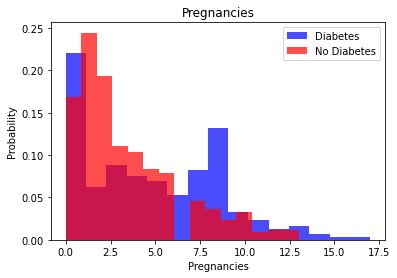

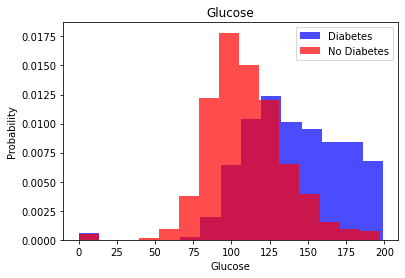

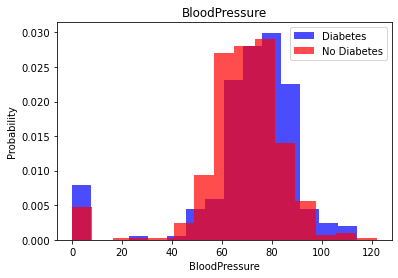

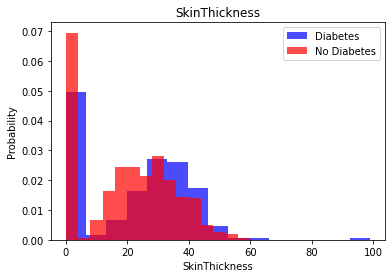

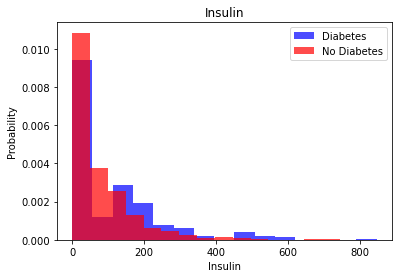

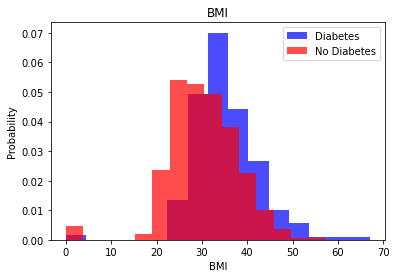

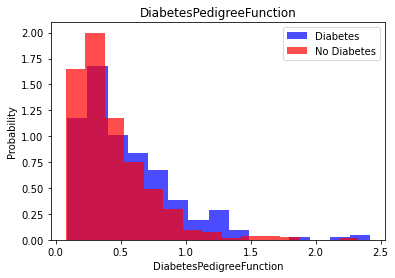

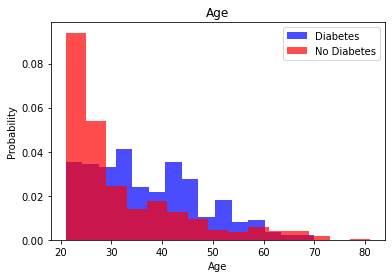

In [11]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome'] == 1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15)
    plt.hist(df[df['Outcome'] == 0][label], color='red', label="No Diabetes", alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [14]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [25]:
# Scale the quantities
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [32]:
over =RandomOverSampler()
X,y = over.fit_resample(X,y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)


In [33]:
len(transformed_df[transformed_df['Outcome'] ==1]), len(transformed_df[transformed_df['Outcome'] ==0])

(500, 500)

In [34]:
# 60% of data for training
# 20% of data for validation
# 20% of data for test

# Splits the data into training and temp data (60/40)
# the temp data is then further divided into test and validation data (50/50)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=0)


In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), # if x <= 0, x=0. else if x > 0, x = x
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # binary mapping; if x <= 0, x=0. else if x > 0 x = 1
])

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [37]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 1s 10ms/step - loss: 0.7238 - accuracy: 0.4383


[0.723818838596344, 0.43833333253860474]

In [39]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid),)

Epoch 1/50
38/38 [==============================] - 1s 15ms/step - loss: 0.4795 - accuracy: 0.7800 - val_loss: 0.4872 - val_accuracy: 0.7700
Epoch 2/50
38/38 [==============================] - 0s 10ms/step - loss: 0.4777 - accuracy: 0.7850 - val_loss: 0.4860 - val_accuracy: 0.7800
Epoch 3/50
38/38 [==============================] - 0s 10ms/step - loss: 0.4763 - accuracy: 0.7833 - val_loss: 0.4829 - val_accuracy: 0.7650
Epoch 4/50
38/38 [==============================] - 0s 9ms/step - loss: 0.4751 - accuracy: 0.7817 - val_loss: 0.4846 - val_accuracy: 0.7750
Epoch 5/50
38/38 [==============================] - 0s 10ms/step - loss: 0.4731 - accuracy: 0.7833 - val_loss: 0.4834 - val_accuracy: 0.7700
Epoch 6/50
38/38 [==============================] - 0s 12ms/step - loss: 0.4720 - accuracy: 0.7850 - val_loss: 0.4827 - val_accuracy: 0.7750
Epoch 7/50
38/38 [==============================] - 0s 11ms/step - loss: 0.4711 - accuracy: 0.7833 - val_loss: 0.4801 - val_accuracy: 0.7700
Epoch 8/50
38/

In [40]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.4328 - accuracy: 0.8150


[0.43280738592147827, 0.8149999976158142]